# Programming Exercise 3A: Two-Compartment Model

In this exercise, we will study a model consisting of only two compartments. This reduction makes it easier to understand the role that the compartmental-model parameters play. Since we have already implemented an N-compartment model on the last exercise sheet, we can reuse most of the code.

In particular, consider the following circuit:
![](rc_circuit_compartments_small.png)
The equations governing the system are given by
$$
C_m \frac{\text{d} V_1}{\text{d} t} + \frac{V_1 - E_m}{R_m} - I_e = \frac{V_2 - V_1}{R_a},
$$
and
$$
C_m \frac{\text{d} V_2}{\text{d} t} + \frac{V_2 - E_m}{R_m} = \frac{V_1 - V_2}{R_a}.
$$
We can easily verify that we can treat the system using our code from the last exercise sheet by appending a sealed-end compartment to both sides of our system; the sealed ends have the same voltage as their respective neighbours, meaning that there is no axial current between the "inner" compartments and the end compartments. Then the two inner compartments fulfill the differential equations given above.

Hence we end up with a model consisting of four compartments, where $V(0,t) = V(1,t)$ and $V(3,t) = V(2,t)$, and the compartments with indices $1$ and $2$ are "surrounded compartments".

For inital parameter values, set $E_m = 0V$, $C_m = 75pF$, $R_m = 265M\Omega$, and $R_a = 7M\Omega$. Let $N$ denote the number of compartments.

<div class="alert alert-block alert-success">
<b>Task:</b> Initialize the model parameters.
</div>

In [113]:
# Import the standard libraries
import numpy as np
import matplotlib.pyplot as plt

### YOUR CODE HERE ###
E_m, C_m, R_m, R_a, N = 0, 75e-12, 265e6, 7e6, 4

### YOUR CODE HERE ###

On the last exercise sheet, we already wrote a function that performs a step of an Euler approximation for a surrounded compartment in a multi-compartment model. In case you had trouble with the exercise, the function is pre-implemented here. Feel free to use your own function from last week instead!

In [114]:
def surrounded_compartment_step(V, I_e, compartment_index, E_m, C_m, R_m, R_a, delta_t):
    '''Implements a step of the Euler approximation for a non-boundary compartment

    Args:
        V: np.array of length N containing the voltages before taking the Euler step
        I_e: np.array of length N containg the input current before taking the Euler step
        compartment_index: Compartment to be updated in the step
        E_m: Resting potential
        R_m: Membrane resistance
        R_a: Axial resistance
        delta_t: Time constant for the Euler approximation

    Returns:
        np.array of length N containing the voltages after updating compartment compartment_index
    '''

    V_here = V[compartment_index]
    V_left = V[compartment_index - 1]
    V_right = V[compartment_index + 1]
    dV_dt = ((E_m - V_here) / R_m + (V_right - V_here) / R_a + (V_left - V_here) / R_a + I_e[compartment_index]) / C_m
    # Compute the voltage after the step
    V[compartment_index] = V_here + delta_t * dV_dt

    return V

First, let's study the voltage response to a rectangular input current defined by
$$
I_e(t) = 
\begin{cases}
0, & (t < t_e) \vee (t_s \leq t) \vee (j\neq j_e) \\
I_0, & (t_e \leq t < t_s) \wedge (j = j_e)
\end{cases},
$$
with $t_e = 0.4s$, $t_s = 0.44s$, $I_0 = -100pA$ and $j_e = 1$.
We use $0$ as starting index, so compartment $1$ will be the $2$nd one. We assume that at $t=0$, both compartments are at resting potential (i.e. V(0) = 0).

<div class="alert alert-block alert-success">
<b>Task:</b> Complete the function rectangle_input() to implement the input function above. Then implement the necessary parameters.
</div>

In [115]:
def rectangle_input(t, N, input_compartment, I_0):
    '''Implements the step-input function.

    Args:
        t: Time in miliseconds
        N: Number of compartments in the model
        input_compartment: Compartment in which the current is injected
        I_0: The value of the input current

    Returns:
        The input current at a given time as a np.array of length N
    '''

    ### YOUR CODE HERE ###
    I_e = np.zeros(N)
    if (0.4 <= t < 0.44) and (input_compartment==1):
        I_e[input_compartment] = I_0
    
    return I_e

    ### YOUR CODE HERE ###

In [116]:
t_start, t_stop, delta_t = 0., 0.6, 0.0001 # s

### YOUR CODE HERE ###

input_compartment = 1
I_0 = -100e-12

### YOUR CODE HERE ###

time_axis = np.arange(t_start, t_stop, delta_t)

<div class="alert alert-block alert-success">
<b>Task:</b> Run the simulation of the model to approximate the voltage values over time in each compartment. Use the time parameters given in the cell above. Run the simulation three times, with differing values of $R_a$. In particular, use the values $R_{a,1} = 7M\Omega$, $R_{a,2} = 265M\Omega$, $R_{a,3} = 30G\Omega$. For each run, plot the voltage over time in compartments $1$ and $2$.
    
<i>Hint:</i> The loop should be similar to the one from the last exercise sheet. The first thing you should do within each iteration over time is setting the voltage values in compartments $0$ and $3$. Then you can call your surrounded_compartment_step() function on the compartments of interest. 
</div>

In [117]:
### YOUR CODE HERE
L =[]
R_as = [7e6, 265e6, 30e9]
for R_a in R_as:
  V = np.zeros((len(time_axis), N))
  I = np.zeros((len(time_axis), N))
  for i, t in enumerate(time_axis[:-1]):  
      I_e = rectangle_input(t, N, input_compartment, I_0)
      I[i,:] = I_e
      V[i, 0] = V[i, 1]
      for j in range(1, N-1):
        V[i+1,:] = surrounded_compartment_step(V[i,:], I_e, j, E_m, C_m, R_m, R_a, delta_t)  
      V[i, N-1] = V[i, N-2] 
  L.append(V)

### YOUR CODE HERE ###

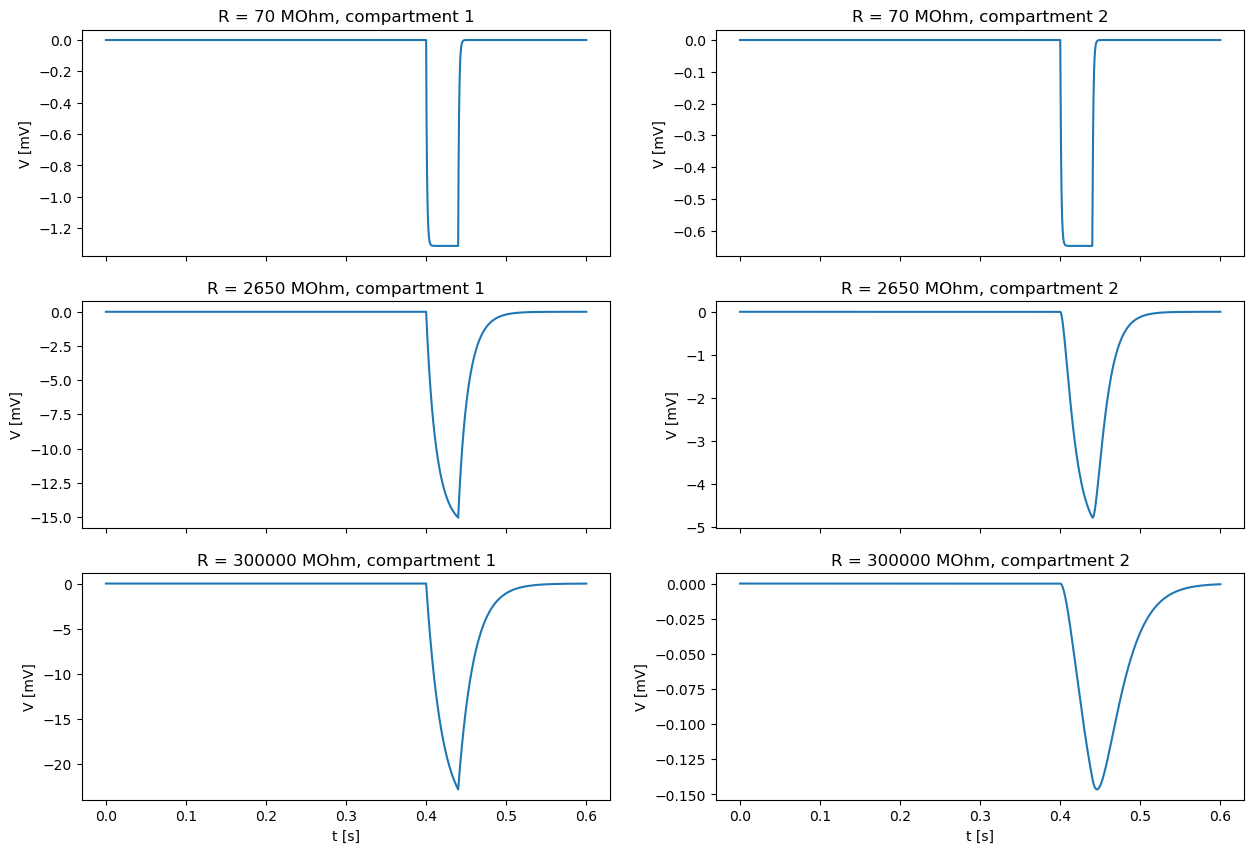

In [118]:
### YOUR CODE HERE
fig, ax = plt.subplots(3,2, figsize = (15,10), sharex=True)
for i in range(3):
  ax[i][0].plot(time_axis, L[i].T[1]*1000)
  ax[i][1].plot(time_axis, L[i].T[2]*1000)
  ax[2][0].set_xlabel("t [s]")
  ax[i][0].set_ylabel("V [mV]")
  ax[2][1].set_xlabel("t [s]")
  ax[i][1].set_ylabel("V [mV]")
  ax[i][0].set_title(f"R = {int(R_as[i]*10e-6)} MOhm, compartment 1")
  ax[i][1].set_title(f"R = {int(R_as[i]*10e-6)} MOhm, compartment 2")
      
### YOUR CODE HERE ###

<div class="alert alert-block alert-success">
<b>Task:</b> Briefly summarize the quantitative findings. How do you explain the results?
</div>

<b> Your Answer: </b> the higher the resistance, the higher the Voltage in compartment 1. 

Finally, let's simulate the response to a sinusoidal input current

$$
I_e (t) = 
\begin{cases}
0, &  (j\neq j_e) \\
100pA  \sin(2\pi f t), &  (j = j_e)
\end{cases}.
$$

for $R_a = 300M\Omega$, $j_e = 1$ and different frequencies $f$. For $C_m$, $R_m$ and $E_m$, we use the same values as before.

<div class="alert alert-block alert-success">
<b>Task:</b> Implement the sinusoidal input.
</div>

In [119]:
def sinusoidal_input(t, N, input_compartment, f):
    '''Implements the sinusoidal input function.

    Args:
        t: Time in miliseconds
        N: Number of compartments in the model
        input_compartment: Compartment in which the current is injected
        f: The frequency

    Returns:
        The input current at a given time as a np.array of length N
    '''

    ### YOUR CODE HERE ###
    I_e = np.zeros(N)
    I_e[input_compartment] = 100e-12*np.sin(2*np.pi*f*t)
    return I_e
    ### YOUR CODE HERE ###

<div class="alert alert-block alert-success">
<b>Task:</b> Simulate the time-dependent voltage in the compartments 1 and 2 for the frequencies
<ul>
  <li>1Hz</li>
  <li>2Hz</li>
  <li>5Hz</li>
  <li>10Hz</li>
  <li>20Hz</li>
  <li>50Hz</li>
  <li>100Hz</li>
  <li>200Hz</li>
  <li>500Hz</li>
  <li>1000Hz</li>
  <li>2000Hz.</li>
</ul>
Plot the voltage-response against time for $f=50$Hz.
    
After the system has settled into a sinusoidal response (e.g. $t > 1s$), plot the logarithm of the voltage amplitude (for both compartments 1 and 2) against the logarithm of the input frequency (Bode diagram).
   
</div>

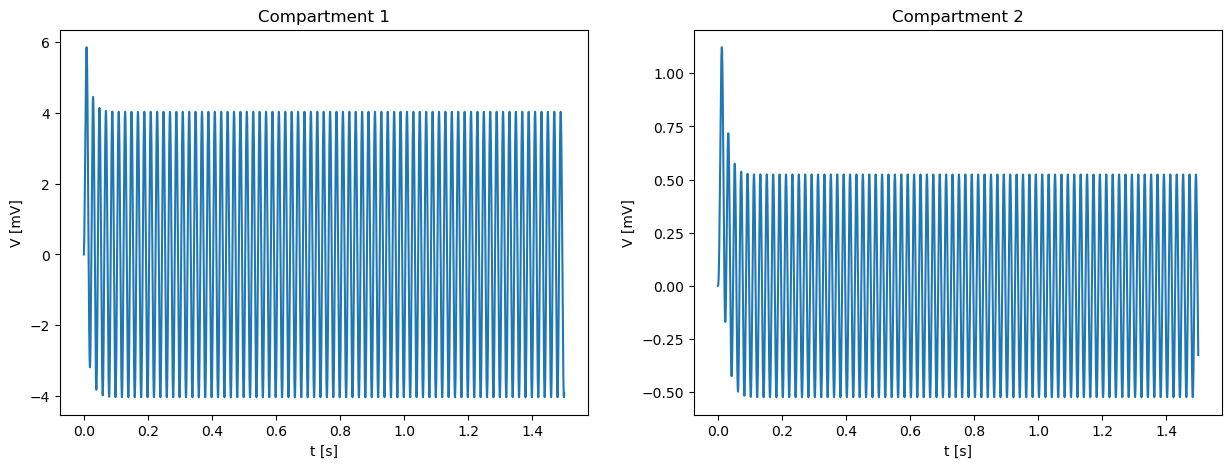

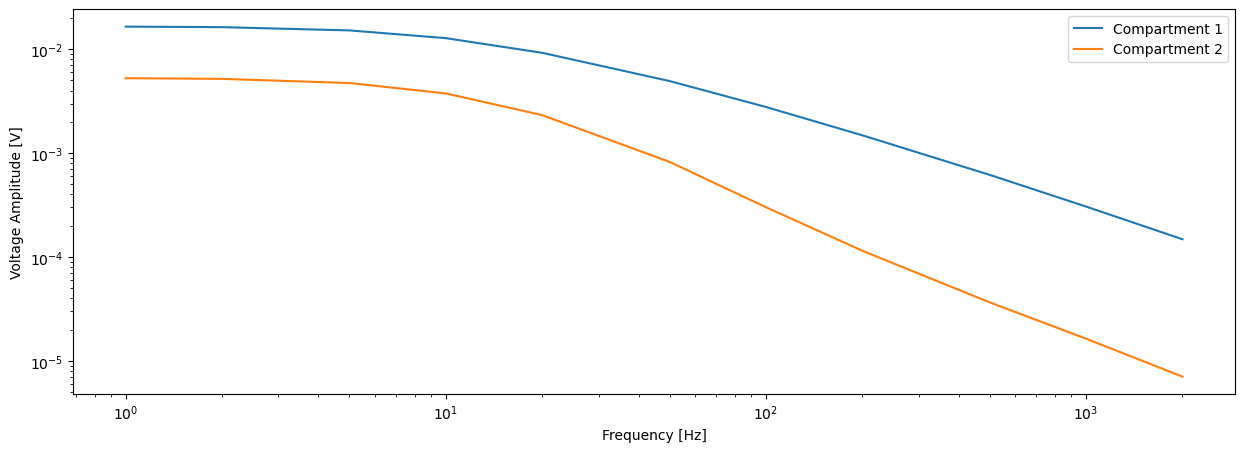

In [120]:
frequencies = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
t_start, t_stop, delta_t = 0., 1.5, 0.0001 # s
time_axis = np.arange(t_start, t_stop, delta_t)
R_a = 300e6 # Ohm

### YOUR CODE HERE
L = []
for f in frequencies:
  V = np.zeros((len(time_axis), N))
  I = np.zeros((len(time_axis), N))
  for i, t in enumerate(time_axis[:-1]):  
    I_e = sinusoidal_input(t, N, input_compartment, f)
    I[i,:] = I_e
    V[i, 0] = V[i, 1]
    for j in range(1, N-1):
      V[i+1,:] = surrounded_compartment_step(V[i,:], I_e, j, E_m, C_m, R_m, R_a, delta_t)  
    V[i, N-1] = V[i, N-2] 
  L.append(V)

fig, ax = plt.subplots(1,2, figsize = (15,5))
for compartment in [1,2]:
  ax[compartment-1].plot(time_axis, L[5].T[compartment]*1000)
  ax[compartment-1].set_xlabel("t [s]")
  ax[compartment-1].set_ylabel("V [mV]")
  ax[compartment-1].set_title(f"Compartment {compartment}")
plt.show()

## Bode diagram
fig,ax = plt.subplots(figsize = (15,5))
for compartment in [1,2]:
    amplitude = []
    for i, freq in enumerate(frequencies):
        amp = (np.max(L[i].T[compartment][:10000])-np.min(L[i].T[compartment][:10000]))/2
        amplitude.append(amp)
    plt.loglog(frequencies,amplitude,label=f"Compartment {compartment}")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Voltage Amplitude [V]")
plt.legend()
plt.show()

### YOUR CODE HERE ###

<div class="alert alert-block alert-success">
<b>Task:</b> How do you interpret the Bode diagram?
</div>

<b> Your Answer: </b> As the frequency goes up, the voltage strength goes down. This happens because the input current pulse gets narrower at higher frequencies, causing the voltage amplitude to decrease. The voltage in compartment 1 is always higher than compartment 2 due to the injected current. 